In [7]:
!pip install scikit-learn

Looking in indexes: https://****@pkgs.dev.azure.com/msci-otw/_packaging/msci-otw-org-feed/pypi/simple, https://pypi.python.org/simple


In [8]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import colorsys

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [ ]:
def get_brightness(color):
    r, g, b = color
    return 0.299 * r + 0.587 * g + 0.114 * b  # luminance


def get_saturation(color):
    r, g, b = color / 255
    return colorsys.rgb_to_hsv(r, g, b)[1]


def get_hue(color):
    r, g, b = color / 255
    return colorsys.rgb_to_hsv(r, g, b)[0]


def rgb_to_hex(color):
    return "#{:02x}{:02x}{:02x}".format(*color)

In [ ]:
imgs = [
    "s3_1.webp",
    "s3_2.webp",
    "s3_3.webp",
    "s3_4.webp",
    "s3_5.webp",
    "s3_poster.webp",
]


Processing: s3_1.webp
Predominant: RGB [145 135 135] -> HEX #918787
Dark: RGB [69 54 73] -> HEX #453649
Light: RGB [238 238 226] -> HEX #eeeee2
Median Brightness: RGB [175 166 165] -> HEX #afa6a5
Most Saturated: RGB [69 54 73] -> HEX #453649
Least Saturated: RGB [238 238 226] -> HEX #eeeee2
Coolest: RGB [145 135 135] -> HEX #918787
Warmest: RGB [114 101 110] -> HEX #72656e


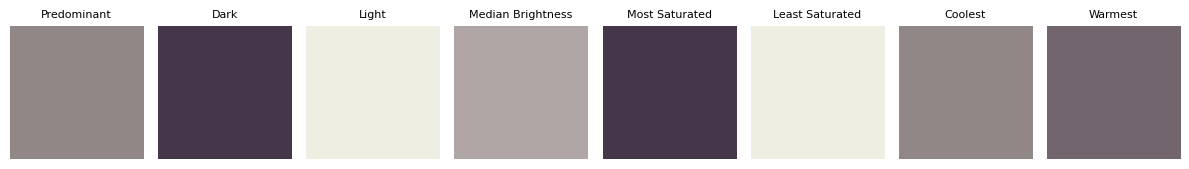


Processing: s3_2.webp
Predominant: RGB [167 147 153] -> HEX #a79399
Dark: RGB [71 51 71] -> HEX #473347
Light: RGB [238 226 209] -> HEX #eee2d1
Median Brightness: RGB [167 147 153] -> HEX #a79399
Most Saturated: RGB [71 51 71] -> HEX #473347
Least Saturated: RGB [201 182 183] -> HEX #c9b6b7
Coolest: RGB [238 226 209] -> HEX #eee2d1
Warmest: RGB [201 182 183] -> HEX #c9b6b7


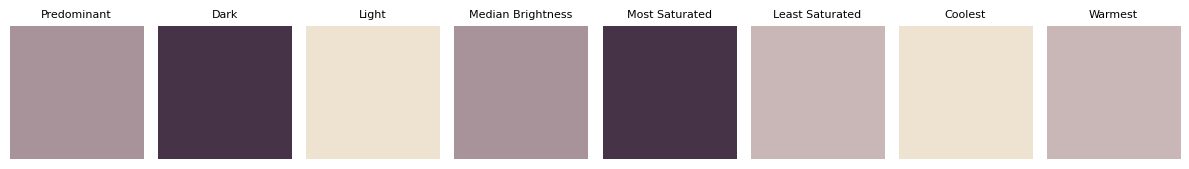


Processing: s3_3.webp
Predominant: RGB [187 183 167] -> HEX #bbb7a7
Dark: RGB [ 76 101  70] -> HEX #4c6546
Light: RGB [223 213 190] -> HEX #dfd5be
Median Brightness: RGB [151 174  70] -> HEX #97ae46
Most Saturated: RGB [151 174  70] -> HEX #97ae46
Least Saturated: RGB [151 138 151] -> HEX #978a97
Coolest: RGB [223 213 190] -> HEX #dfd5be
Warmest: RGB [151 138 151] -> HEX #978a97


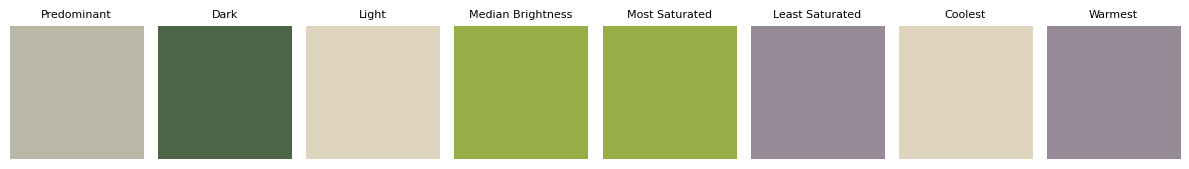


Processing: s3_4.webp
Predominant: RGB [194 166 168] -> HEX #c2a6a8
Dark: RGB [ 99  85 140] -> HEX #63558c
Light: RGB [238 217 171] -> HEX #eed9ab
Median Brightness: RGB [194 166 168] -> HEX #c2a6a8
Most Saturated: RGB [209 133  83] -> HEX #d18553
Least Saturated: RGB [194 166 168] -> HEX #c2a6a8
Coolest: RGB [209 133  83] -> HEX #d18553
Warmest: RGB [194 166 168] -> HEX #c2a6a8


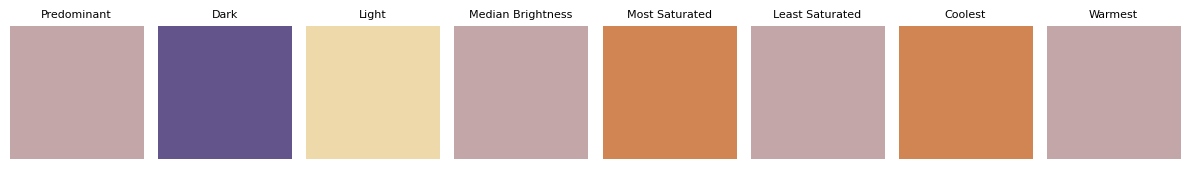


Processing: s3_5.webp
Predominant: RGB [198 152 156] -> HEX #c6989c
Dark: RGB [ 90  76 132] -> HEX #5a4c84
Light: RGB [248 241 197] -> HEX #f8f1c5
Median Brightness: RGB [188 174 197] -> HEX #bcaec5
Most Saturated: RGB [ 90  76 132] -> HEX #5a4c84
Least Saturated: RGB [188 174 197] -> HEX #bcaec5
Coolest: RGB [239 185 147] -> HEX #efb993
Warmest: RGB [198 152 156] -> HEX #c6989c


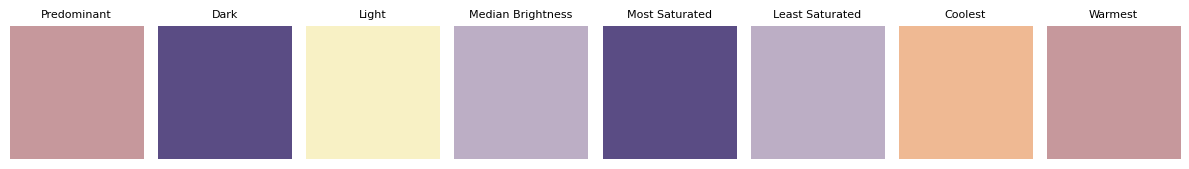


Processing: s3_poster.webp
Predominant: RGB [164 179 166] -> HEX #a4b3a6
Dark: RGB [ 74  50 131] -> HEX #4a3283
Light: RGB [240 236 213] -> HEX #f0ecd5
Median Brightness: RGB [164 179 166] -> HEX #a4b3a6
Most Saturated: RGB [ 74  50 131] -> HEX #4a3283
Least Saturated: RGB [164 179 166] -> HEX #a4b3a6
Coolest: RGB [240 236 213] -> HEX #f0ecd5
Warmest: RGB [196 143 210] -> HEX #c48fd2


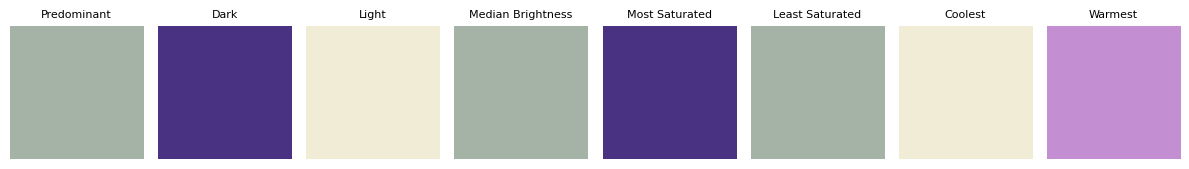

In [ ]:
for x in imgs:
    print(f"\nProcessing: {x}")
    image = Image.open(x).resize((200, 200))
    image_np = np.array(image).reshape(-1, 3)

    kmeans = KMeans(n_clusters=6, n_init=10).fit(image_np)
    colors = kmeans.cluster_centers_.astype(int)

    labels = kmeans.labels_
    counts = np.bincount(labels)
    predominant = colors[np.argmax(counts)]

    brightness_sorted = sorted(colors, key=get_brightness)
    dark = brightness_sorted[0]
    light = brightness_sorted[-1]
    median_brightness = brightness_sorted[len(brightness_sorted) // 2]

    saturation_sorted = sorted(colors, key=get_saturation)
    most_saturated = saturation_sorted[-1]
    least_saturated = saturation_sorted[0]

    hue_sorted = sorted(colors, key=get_hue)
    coolest = hue_sorted[0]
    warmest = hue_sorted[-1]

    types = {
        "Predominant": predominant,
        "Dark": dark,
        "Light": light,
        "Median Brightness": median_brightness,
        "Most Saturated": most_saturated,
        "Least Saturated": least_saturated,
        "Coolest": coolest,
        "Warmest": warmest,
    }

    for name, color in types.items():
        hex_code = rgb_to_hex(color)
        print(f"{name}: RGB {color} -> HEX {hex_code}")

    # Visualize
    plt.figure(figsize=(12, 2))
    for i, (name, color) in enumerate(types.items()):
        plt.subplot(1, len(types), i + 1)
        plt.axis("off")
        plt.imshow([[color / 255]])
        plt.title(name, fontsize=8)
    plt.tight_layout()
    plt.show()

In [ ]:
!pip install supabase

Looking in indexes: https://****@pkgs.dev.azure.com/msci-otw/_packaging/msci-otw-org-feed/pypi/simple, https://pypi.python.org/simple
  Using cached storage3-0.11.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached websockets-14.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached StrEnum-0.4.15-py3-none-any.whl.metadata (5.3 kB)
  Using cached pytest-8.3.5-py3-none-any.whl.metadata (7.6 kB)
  Using cached pluggy-1.5.0-py3-none-any.whl.metadata (4.8 kB)
Using cached storage3-0.11.3-py3-none-any.whl (17 kB)
Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
Using cached StrEnum-0.4.15-py3-none-any.whl (8.9 kB)
Using cached websockets-14.2-cp311-cp311-macosx_11_0_arm64.whl (160 kB)
Using cached pytest-8.3.5-py3-none-any.whl (343 kB)
Using cached pluggy-1.5.0-py3-none-any.whl (20 kB)
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websocke

In [ ]:
import json

from models import PayloadBase

with open("data.json", "r") as f:
    data = json.load(f)

In [ ]:
data

[{'title': 'Luna and the Starlight Adbenture',
  'poster': 'images/s1_poster.webp',
  'poster_pallet': {'predominant': '365e61',
   'dark': '365e61',
   'light': 'f6ead4',
   'median_brightness': 'a3b8aa',
   'most_saturated': 'f06333',
   'least_saturated': 'a3b8aa',
   'coolest': 'f06333',
   'warmest': '365e61'},
  'story': [{'content': 'Luna was a curious little fox who lived in the whispering woods. She loved watching the stars every night from her cozy treehouse.',
    'image': 'images/s1_1.webp',
    'image_pallet': {'predominant': '553332',
     'dark': '553332',
     'light': 'e3ddc4',
     'median_brightness': '8ea59e',
     'most_saturated': 'a86653',
     'least_saturated': 'e3ddc4',
     'coolest': '553332',
     'warmest': '597172'}},
   {'content': 'One evening, Luna saw a star twinkle three times and then disappear. “That star needs help!” she gasped.',
    'image': 'images/s1_2.webp',
    'image_pallet': {'predominant': 'b57f6f',
     'dark': '7e5632',
     'light': 'f

In [ ]:
# for i in data:
#     img_path = i['poster']
#     response = (
#         supabase.storage
#         .from_("childapps")
#         .get_public_url(img_path)
#     )
#     i['poster'] = response
#     for j in i['story']:
#         img_s_path = j['image']
#         response = (
#             supabase.storage
#             .from_("childapps")
#             .get_public_url(img_s_path)
#         )
#         j['image'] = response

In [ ]:
data

[{'title': 'Luna and the Starlight Adbenture',
  'poster': 'https://iqescxirvpvbjkifbrwu.supabase.co/storage/v1/object/public/childapps/images/s1_poster.webp?',
  'poster_pallet': {'predominant': '365e61',
   'dark': '365e61',
   'light': 'f6ead4',
   'median_brightness': 'a3b8aa',
   'most_saturated': 'f06333',
   'least_saturated': 'a3b8aa',
   'coolest': 'f06333',
   'warmest': '365e61'},
  'story': [{'content': 'Luna was a curious little fox who lived in the whispering woods. She loved watching the stars every night from her cozy treehouse.',
    'image': 'https://iqescxirvpvbjkifbrwu.supabase.co/storage/v1/object/public/childapps/images/s1_1.webp?',
    'image_pallet': {'predominant': '553332',
     'dark': '553332',
     'light': 'e3ddc4',
     'median_brightness': '8ea59e',
     'most_saturated': 'a86653',
     'least_saturated': 'e3ddc4',
     'coolest': '553332',
     'warmest': '597172'}},
   {'content': 'One evening, Luna saw a star twinkle three times and then disappear. “T

In [ ]:
# with open("data_2.json", "w") as f:
#     json.dump(data, f, indent=2)

In [ ]:
from PIL import Image


def compress_jpeg(input_path, output_path, quality=75):
    image = Image.open(input_path)
    image.save(output_path, format="JPEG", optimize=True, quality=quality)

In [10]:
import os

In [ ]:
for i in os.listdir("images_copy"):
    path = "images/" + i
    compress_jpeg(path, path, quality=70)

In [ ]:
!pip install yt-dlp


Looking in indexes: https://****@pkgs.dev.azure.com/msci-otw/_packaging/msci-otw-org-feed/pypi/simple, https://pypi.python.org/simple


In [ ]:
import yt_dlp

In [1]:
import yt_dlp

shorts_url = "https://www.youtube.com/@Kidlyseeken/shorts"
max_results = 10  # Lowered for faster demo

# Step 1: Get list of shorts URLs
fetch_opts = {
    "quiet": True,
    "extract_flat": True,
    "force_generic_extractor": True,
}

shorts_links = []

with yt_dlp.YoutubeDL(fetch_opts) as ydl:
    info = ydl.extract_info(shorts_url, download=False)
    entries = info.get("entries", [])

    for entry in entries[:max_results]:
        if "id" in entry:
            shorts_links.append(f"https://www.youtube.com/shorts/{entry['id']}")

# Step 2: Get views and likes for each short
details_opts = {
    "quiet": True,
    "skip_download": True,
    "forcejson": True,
}

results = []

with yt_dlp.YoutubeDL(details_opts) as ydl:
    for url in shorts_links:
        try:
            info = ydl.extract_info(url, download=False)
            title = info.get("title")
            view_count = info.get("view_count")
            like_count = info.get("like_count")
            results.append({
                "title": title,
                "url": url,
                "views": view_count,
                "likes": like_count
            })
        except Exception as e:
            print(f"Error fetching {url}: {e}")

# Print nicely
for video in results:
    print(f"{video['title']}\nURL: {video['url']}\nViews: {video['views']}, Likes: {video['likes']}\n")


IDENTIFY THE  IMAGE | kids IQ video | learn with fun | educational video |AI Generated videos
URL: https://www.youtube.com/shorts/9Fy6x2zP9YM
Views: 7955, Likes: 249

SMART KIDS IQ  QUESTIONS : fun & educational videos | Brain-boosting questions | AI Generated video
URL: https://www.youtube.com/shorts/zAgAZFCl1JY
Views: 27545, Likes: 958

VALUE | lesson | learning video for kids | moral stories for kids  #moralstory #story #morallesson
URL: https://www.youtube.com/shorts/UwzkUWEVxzg
Views: 55526, Likes: 1970

SEEDS OF TRANSFORMATION : moral stories for kids | AI Generated video for kids learning | knowledge
URL: https://www.youtube.com/shorts/cr7krEBkXH4
Views: 52897, Likes: 2252

DAISY THE CURIOUS COW : A Tale of Exploration and Homecoming | moral stories for kids learning | AI
URL: https://www.youtube.com/shorts/cIrHzxPhERA
Views: 13073, Likes: 484

THE GRATEFUL SHADE : Be grateful to those who help you | AI Generated video for kids learning
URL: https://www.youtube.com/shorts/lSBFjb

In [3]:
import yt_dlp

shorts_url = "https://www.youtube.com/@CoComelon/shorts"
max_results = 20  # Lowered for faster demo

# Step 1: Get list of shorts URLs
fetch_opts = {
    "quiet": True,
    "extract_flat": True,
    "force_generic_extractor": True,
}

shorts_links = []

with yt_dlp.YoutubeDL(fetch_opts) as ydl:
    info = ydl.extract_info(shorts_url, download=False)
    entries = info.get("entries", [])

    for entry in entries[:max_results]:
        if "id" in entry:
            shorts_links.append(f"https://www.youtube.com/shorts/{entry['id']}")

# Step 2: Get views and likes for each short
details_opts = {
    "quiet": True,
    "skip_download": True,
    "forcejson": True,
}

results = []

with yt_dlp.YoutubeDL(details_opts) as ydl:
    for url in shorts_links:
        try:
            info = ydl.extract_info(url, download=False)
            title = info.get("title")
            view_count = info.get("view_count")
            like_count = info.get("like_count")
            results.append({
                "title": title,
                "url": url,
                "views": view_count,
                "likes": like_count
            })
        except Exception as e:
            print(f"Error fetching {url}: {e}")

# # Print nicely
# for video in results:
#     print(f"{video['title']}\nURL: {video['url']}\nViews: {video['views']}, Likes: {video['likes']}\n")


CHOOSE your JJ! Ultimate Baby JJ 👶🏼 Challenge! #shorts #cocomelon
URL: https://www.youtube.com/shorts/famUYDcS7oY
Views: 171066, Likes: 6757

Which Color Ball Rolls the FASTEST 🔴🟠🟡🟢🔵🟣 ?! Fun Color Learning Toy for Kids! #shorts
URL: https://www.youtube.com/shorts/cesrg8EoslE
Views: 280030, Likes: 6397

Spin the CoComelon Wheel and Win a 🎈🐻 BALLOON ANIMAL! Guess Which Animal! #shorts
URL: https://www.youtube.com/shorts/XC7alcOCZ2U
Views: 674930, Likes: 15656

Are Strawberries Red or Blue 🔴🔵?! Learn Colors with Fruit! #cocomelon #shorts
URL: https://www.youtube.com/shorts/9yw3enLm3pY
Views: 655772, Likes: 20582

123 Count the Broccoli 🥦 Pumpkins 🎃 and Carrots 🥕! JJ Learns Numbers! #cocomelon #shorts
URL: https://www.youtube.com/shorts/SxRDVwSZzAM
Views: 513953, Likes: 13384

Mom and JJ make Fruit Ice Cream 🍓 🍍🍌 for Snack Time! #cocomelon #shorts
URL: https://www.youtube.com/shorts/M8D3EfWVOCE
Views: 585845, Likes: 15349

Learn Colors 🔴🟠🟡🟢🔵🟣 by Stacking the Rainbow Ring TOYS! #shorts #coc

In [4]:
results

[{'title': 'CHOOSE your JJ! Ultimate Baby JJ 👶🏼 Challenge! #shorts #cocomelon',
  'url': 'https://www.youtube.com/shorts/famUYDcS7oY',
  'views': 171066,
  'likes': 6757},
 {'title': 'Which Color Ball Rolls the FASTEST 🔴🟠🟡🟢🔵🟣 ?! Fun Color Learning Toy for Kids! #shorts',
  'url': 'https://www.youtube.com/shorts/cesrg8EoslE',
  'views': 280030,
  'likes': 6397},
 {'title': 'Spin the CoComelon Wheel and Win a 🎈🐻 BALLOON ANIMAL! Guess Which Animal! #shorts',
  'url': 'https://www.youtube.com/shorts/XC7alcOCZ2U',
  'views': 674930,
  'likes': 15656},
 {'title': 'Are Strawberries Red or Blue 🔴🔵?! Learn Colors with Fruit! #cocomelon #shorts',
  'url': 'https://www.youtube.com/shorts/9yw3enLm3pY',
  'views': 655772,
  'likes': 20582},
 {'title': '123 Count the Broccoli 🥦 Pumpkins 🎃 and Carrots 🥕! JJ Learns Numbers! #cocomelon #shorts',
  'url': 'https://www.youtube.com/shorts/SxRDVwSZzAM',
  'views': 513953,
  'likes': 13384},
 {'title': 'Mom and JJ make Fruit Ice Cream 🍓 🍍🍌 for Snack Time! #

In [ ]:
import os
import re

folder = "ytd"
files = os.listdir(folder)


def slugify(title):
    return re.sub(r"\W+", "_", title).strip("_").lower()


for filename in files:
    old_path = os.path.join(folder, filename)
    name, ext = os.path.splitext(filename)
    new_name = slugify(name) + ext
    new_path = os.path.join(folder, new_name)

    if old_path != new_path:
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} → {new_name}")

Renamed: THE GRATEFUL GAURDIAN ： Simon's Lesson of Misjudgment ｜ moral story for kids ｜ AI Generated video.mp4 → the_grateful_gaurdian_simon_s_lesson_of_misjudgment_moral_story_for_kids_ai_generated_video.mp4
Renamed: Lily the Ladybug： A Colorful Adventure ｜ Bedtime Story for Kids.mp4 → lily_the_ladybug_a_colorful_adventure_bedtime_story_for_kids.mp4
Renamed: The Magical Power of Sharing： A Captivating Moral Story for Kids ｜ AI Generated Short Video.mp4 → the_magical_power_of_sharing_a_captivating_moral_story_for_kids_ai_generated_short_video.mp4
Renamed: ONE GOOD TURN DESERVES ANOTHER ： A Heartwarming Tale of Kindness  ｜ Moral story ｜ AI Generated video.mp4 → one_good_turn_deserves_another_a_heartwarming_tale_of_kindness_moral_story_ai_generated_video.mp4
Renamed: The Lazy Boy's Transformation： A Bedtime Story of Hard Work and Success ｜ AI Generated Video #story.mp4 → the_lazy_boy_s_transformation_a_bedtime_story_of_hard_work_and_success_ai_generated_video_story.mp4
Renamed: A to Z： A

In [34]:
import json

In [ ]:
t = os.listdir("ytd")
data_link = []
for i in t:
    path = "shorts/" + i
    response = supabase.storage.from_("childapps").get_public_url(path)
    data_link.append(response)

In [36]:
with open("data_link.json", "w") as f:
    json.dump(data_link, f, indent=2)

In [ ]:
from ba models import PayloadBase

ImportError: cannot import name 'PayloadBase' from 'models' (/Users/vijayshankar/Desktop/backendx/models/__init__.py)